The example is from the Figure 5.7 of the textbook

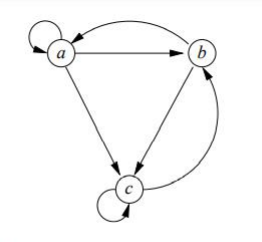

β  is  set to 0.8 and the transition matrix is provided:

In [68]:
import numpy as np
num_of_nodes = 3
beta = 0.8
m = np.array([[0.33333333,0.5,0],
              [0.33333333,0,0.5],
              [0.33333333,0.5,0.5]],
             dtype=float)

First the pagerank for each node is initialized:

In [70]:
def init_pr(num_nodes):
    pr = np.ones((num_nodes,1),dtype=float) / num_nodes
    return pr
pr = init_pr(num_of_nodes)
print(pr.flatten())

[0.33333333 0.33333333 0.33333333]


The formula for calculating Pagerank is: v' = βMv + (1-β)e/n

After 10 iterations, we output the resulting pagerank:

In [72]:
def PR_iteration(v,m,b,n):
    i = 0
    e = (1 - b) * np.ones_like(v) / n
    while(True):
        v = b * np.dot(m,v) + e 
        i += 1
        if i == 10:
            break
    return v
        

print(PR_iteration(pr,m,beta,num_of_nodes).flatten())

[0.259259   0.30864234 0.43209865]


To save memory space, we can divide the matrices into blocks before multiplication or addition. 

For example, we can use only three memory slot to calculate the dot product of two matrices (assume that the two matrices are stored in disk, represented as disk_a and disk_b):

In [73]:
def mult(disk_a,disk_b):
    mem1,mem2,mem3 = 0,0,0
    disk_c = np.zeros((disk_a.shape[0],disk_b.shape[1]))
    for i in range(disk_c.shape[0]):
        for j in range(disk_c.shape[1]):
            for k in range(disk_a.shape[1]):
                mem1 = disk_a[i][k]   #load from disk into memory
                mem2 = disk_b[k][j]
                mem3 += mem1*mem2
            disk_c[i][j] = mem3    #update the data in disk
            mem3 = 0
    return disk_c

In the function above, the block size is 1. Although the memory space is saved, the I/O interaction between memory and disk becomes more frequent and may cost much time. In practice, the block size should be carefully considered.

The result remains the same:

In [74]:
def PR_iteration(v,m,b,n):
    i = 0
    e = (1 - b) * np.ones_like(v) / n
    while(True):
        v = b * mult(m,v) + e 
        i += 1
        if i == 10:
            break
    return v
        

print(PR_iteration(pr,m,beta,num_of_nodes).flatten())

[0.259259   0.30864234 0.43209865]


For topic sensitive PageRank, the formula becomes: v' = βMv + (1-β)s/|s|, where s indicates the relevance to the current topic.

Assume that there are three topics: D,E and F. a and b are related to D, a and c are related to E, b is related to F. 

In [75]:
s_d = np.array([[1],[1],[0]],dtype = float)
s_e = np.array([[1],[0],[1]],dtype = float)
s_f = np.array([[0],[1],[0]],dtype = float)
def init_pr(num_nodes):
    pr = np.ones((num_nodes,1),dtype=float) / num_nodes
    return pr
pr = init_pr(num_of_nodes)
print(pr.flatten())

[0.33333333 0.33333333 0.33333333]


In [77]:
def PR_iteration_topic_sensitive(v,m,b,s):
    i = 0
    while(True):
        v = b * np.dot(m,v) + (1-b)*s /np.sum(s)
        i += 1
        if i == 10:
            break
    return v
        

print("D:",PR_iteration_topic_sensitive(pr,m,beta,s_d).flatten())
print("E:",PR_iteration_topic_sensitive(pr,m,beta,s_e).flatten())
print("F:",PR_iteration_topic_sensitive(pr,m,beta,s_f).flatten())

D: [0.31481475 0.32716058 0.35802466]
E: [0.27777724 0.25926003 0.46296272]
F: [0.22222252 0.40740698 0.3703705 ]
